<a href="https://colab.research.google.com/github/cnguyen75/Data-Science-Projects/blob/master/School_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
school_scores_df = pd.read_csv('/content/drive/MyDrive/school_scores.csv')
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District Of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "Wyoming"]
newColumns = ["Percentage of Expedenture into Education", "Percentage of Expedenture into Police", "Percentage of Expedenture into Correction", "Percentage of Expedenture into Public Welfare"]




In [86]:
columns = school_scores_df.columns
columns = columns[3:]

columns = ["Total.Math", "Total.Verbal"]

print(columns)

for column in columns:
  if (column in newColumns):
    continue
  else:
    title = column + "_Quartile"
    print(title)
    school_scores_df[title] = school_scores_df.groupby("Year")[column].transform(lambda x: pd.qcut(x, 10, labels=False, duplicates="drop"))

#school_scores_df = school_scores_df.reindex(columns = school_scores_df.columns.tolist() + newColumns)
#school_scores_df = school_scores_df.drop(school_scores_df["State.Name"] == "Puerto Rico")

school_scores_df = school_scores_df[school_scores_df["State.Name"] != "Puerto Rico"]
school_scores_df = school_scores_df[school_scores_df["State.Name"] != "Virgin Islands"]
school_scores_df = school_scores_df[school_scores_df["State.Name"] != "West Virginia"]


school_scores_df.loc[(school_scores_df["State.Name"] == "District Of Columbia") & (school_scores_df["Year"] == 2005), "Percentage of Expedenture into Education"] = 5


['Total.Math']
Total.Math_Quartile


In [22]:
school_scores_df.head(55)

,Year,State.Code,State.Name,Total.Math,Total.Test-takers,Total.Verbal,Academic Subjects.Arts/Music.Average GPA,Academic Subjects.Arts/Music.Average Years,Academic Subjects.English.Average GPA,Academic Subjects.English.Average Years,...,Score Ranges.Between 700 to 800.Math.Females_Average,Score Ranges.Between 700 to 800.Math.Males_Average,Score Ranges.Between 700 to 800.Math.Total_Average,Score Ranges.Between 700 to 800.Verbal.Females_Average,Score Ranges.Between 700 to 800.Verbal.Males_Average,Score Ranges.Between 700 to 800.Verbal.Total_Average,Percentage of Expedenture into Education,Percentage of Expedenture into Police,Percentage of Expedenture into Correction,Percentage of Expedenture into Public Welfare
0,2005,AL,Alabama,559,3985,567,3.92,2.2,3.53,3.9,...,NaN,NaN,NaN,NaN,NaN,NaN,0.235501,0.020565,0.019795,0.137851
1,2005,AK,Alaska,519,3996,523,3.76,1.9,3.35,3.9,...,NaN,NaN,NaN,NaN,NaN,NaN,0.308512,0.025881,0.018510,0.138763
2,2005,AZ,Arizona,530,18184,526,3.85,2.1,3.45,3.9,...,NaN,NaN,NaN,NaN,NaN,NaN,0.351134,0.026731,0.023323,0.191249
3,2005,AR,Arkansas,552,1600,563,3.90,2.2,3.61,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.275692,0.038842,0.033407,0.149821
4,2005,CA,California,522,186552,504,3.76,1.8,3.32,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,0.258742,0.034796,0.028728,0.129497
5,2005,CO,Colorado,560,11990,560,3.88,2.2,3.49,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.288516,0.034033,0.025487,0.092191
6,2005,CT,Connecticut,517,34313,517,3.66,2.1,3.13,3.9,...,NaN,NaN,NaN,NaN,NaN,NaN,0.307992,0.028265,0.019591,0.146588
7,2005,DE,Delaware,502,6257,503,3.71,1.8,3.21,3.9,...,NaN,NaN,NaN,NaN,NaN,NaN,0.166885,0.048734,0.019332,0.196874
8,2005,DC,District Of Columbia,478,3622,490,3.54,1.8,3.03,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,0.320234,0.031288,0.028704,0.147789
9,2005,FL,Florida,498,93505,498,3.77,1.8,3.29,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,0.244861,0.043067,0.028634,0.134754


In [6]:
test_df = pd.read_excel('https://www2.census.gov/programs-surveys/gov-finances/tables/2007/summary-tables/07slsstab2a.xls', header=None)
test_df[0] = test_df[0].str.replace(' ', '')
test_df[0] = test_df[0].str.replace('1', '')
test_df = test_df.dropna()
test_df.tail()

#https://www2.census.gov/programs-surveys/gov-finances/tables/2013/summary-tables/13slsstab1b.xlsx

#https://www2.census.gov/programs-surveys/gov-finances/tables/2005/summary-tables/05slsstab1a.xls
#https://www2.census.gov/programs-surveys/gov-finances/tables/2006/summary-tables/06slsstab1a.xls
#https://www2.census.gov/programs-surveys/gov-finances/tables/2007/summary-tables/07slsstab2a.xls
#https://www2.census.gov/programs-surveys/gov-finances/tables/2008/summary-tables/08slsstab1a.xls
#https://www2.census.gov/programs-surveys/gov-finances/tables/2009/summary-tables/09slsstab1a.xls
#https://www2.census.gov/programs-surveys/gov-finances/tables/2010/summary-tables/10slsstab1a.xls
#https://www2.census.gov/programs-surveys/gov-finances/tables/2011/summary-tables/11slsstab1a.xls
#https://www2.census.gov/programs-surveys/gov-finances/tables/2012/summary-tables/12slsstab1a.xlsx
#https://www2.census.gov/programs-surveys/gov-finances/tables/2013/summary-tables/13slsstab1a.xlsx
#https://www2.census.gov/programs-surveys/gov-finances/tables/2014/summary-tables/14slsstab1a.xlsx
#https://www2.census.gov/programs-surveys/gov-finances/tables/2015/summary-tables/15slsstab1a.xlsx
#https://www2.census.gov/programs-surveys/gov-finances/tables/2015/summary-tables/15slsstab1b.xlsx
#https://www2.census.gov/programs-surveys/gov-finances/tables/2006/summary-tables/06slsstab1b.xls

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
179,Miscellaneous,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,Otherthaninsurancetrustfunds,238246345,360065378,26108454,184413582,200211381,2471040,3886423,0,2414209,...,3494986,11406360,160661,2053275,4879041,1986631,1474971,0,399894,1593138
183,Offsetstodebt,87062458,113531238,2439383,58611450,15861940,189095,1470381,0,481972,...,629122,6391202,2243,667698,2299582,806647,200298,0,149161,148451
184,Bondfunds,27068665,55829480,3392084,20860104,62218461,194719,625597,0,153257,...,228296,798266,4896,498407,628572,116951,181494,0,38205,388361
185,Other,124115222,190704660,20276987,104942028,122130980,2087226,1790445,0,1778980,...,2637568,4216892,153522,887170,1950887,1063033,1093179,0,212528,1056326


In [7]:
test_df.loc[test_df[0].values == 'Expenditure']


,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
74,Expenditure,344011929,477239016,45502347,174661680,474929501,2334648,5045441,0,3942416,...,6168690,8368278,238336,1643867,9867313,3102526,2903026,0,498832,4758744


In [8]:
links = []
for i in range(5, 16):
  link = "https://www2.census.gov/programs-surveys/gov-finances/tables/20"
  if (i < 12):
    if (i < 10):
      link = link + "0" + str(i) + "/summary-tables/0" + str(i) + "slsstab"
      if (i == 7):
        link = link + "2a."
      else:
        link = link + "1a."
    else:
      link = link + str(i) + "/summary-tables/" + str(i) + "slsstab1a."
    link = link + "xls"
  else:
    link = link + str(i) + "/summary-tables/" + str(i) + "slsstab1a.xlsx"
  links.append(link)

print(links)

['https://www2.census.gov/programs-surveys/gov-finances/tables/2005/summary-tables/05slsstab1a.xls', 'https://www2.census.gov/programs-surveys/gov-finances/tables/2006/summary-tables/06slsstab1a.xls', 'https://www2.census.gov/programs-surveys/gov-finances/tables/2007/summary-tables/07slsstab2a.xls', 'https://www2.census.gov/programs-surveys/gov-finances/tables/2008/summary-tables/08slsstab1a.xls', 'https://www2.census.gov/programs-surveys/gov-finances/tables/2009/summary-tables/09slsstab1a.xls', 'https://www2.census.gov/programs-surveys/gov-finances/tables/2010/summary-tables/10slsstab1a.xls', 'https://www2.census.gov/programs-surveys/gov-finances/tables/2011/summary-tables/11slsstab1a.xls', 'https://www2.census.gov/programs-surveys/gov-finances/tables/2012/summary-tables/12slsstab1a.xlsx', 'https://www2.census.gov/programs-surveys/gov-finances/tables/2013/summary-tables/13slsstab1a.xlsx', 'https://www2.census.gov/programs-surveys/gov-finances/tables/2014/summary-tables/14slsstab1a.xls

In [9]:
budgets = []
for i in range (0, 11):
  copyString = links[i]
  copyString = copyString.replace("1a", "1b")
  copyString = copyString.replace("2a", "2b")
  budget_df = pd.read_excel(links[i], header=None)
  budget2_df = pd.read_excel(copyString, header=None)

  budget_df = budget_df.dropna()
  budget2_df = budget2_df.dropna()
  change = 1
  if (i < 7):
    change = 0
  else:
    budget2_df = budget2_df.drop(budget2_df.columns[0], axis = 1)

  budget2_df = budget2_df.drop(budget2_df.columns[0], axis = 1)

  print(budget2_df)

  budget_df[change] = budget_df[change].str.replace(' ', '')
  budget_df[change] = budget_df[change].str.replace('1', '')


  budget_df = pd.concat([budget_df, budget2_df], axis=1, ignore_index = True)
  budgets.append(budget_df)

budgets[0]

          1     2         3         4     5        6     7        8    \
11   41339990  0.39  26820654  19808884  0.88  7438360  0.16  5691644   
13   33940598  0.47  21425043  17805103  0.96  6287835  0.19  4624261   
15    8573060  0.14   7904419   5958189  0.46  2046104  0.36  1855485   
16    8573060  0.14   7755530    817530  1.44  2046104  0.36  1842004   
17        (1)   (X)         0   5140659  0.47      (1)   (X)        0   
..        ...   ...       ...       ...   ...      ...   ...      ...   
178         0   (X)         0         0   (X)        0   (X)        0   
180  32287478  0.78  18610051  13677427  1.85  8009422  0.16  5827006   
182  16327126  1.25  13142120   3185006  6.41  3620347  0.03  3011592   
183   1990539  3.05    371309   1619230  3.74   228833  0.46    39484   
184  13969813  0.98   5096622   8873191  1.55  4160242  0.31  2775930   

         9     10   ...       121   122       123       124   125      126  \
11   2670888   0.5  ...  48235097  0.07  3424

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
11,Revenue,2528546342,0.04,1642469224,1307410509,0.09,33376997,0.41,22296792,16397795,...,48235097,0.07,34243202,23287862,0.19,7269200,0.24,5296649,3208075,0.63
13,Generalrevenue,2026034009,0.05,1286900580,1160466820,0.09,27370394,0.44,18910066,13777918,...,36720655,0.09,24611203,21405419,0.2,6155868,0.29,4304075,3087317,0.65
15,Intergovernmentalrevenue,438558114,0.06,407791786,452099719,0.12,7286793,0.35,7303635,5300748,...,7100591,0.12,6693670,9702888,0.25,1912805,0.02,1934879,1213450,0.67
16,FromFederalGovernment,438558114,0.06,386313543,52244571,0.5,7286793,0.35,6691201,595592,...,7100591,0.12,6447734,652857,1.33,1912805,0.02,1824032,88773,0.35
17,FromStategovernment,(1),(X),-,399855148,0.11,(1),(X),-,4705156,...,(1),(X),0,9050031,0.23,(1),(X),0,1124677,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Miscellaneous,9472804,0,9472804,-,(X),-,(X),-,-,...,160120,0,160120,0,(X),0,(X),0,0,(X)
180,Otherthaninsurancetrustfunds,1693282161,0.25,847586591,845695570,0.51,20657766,1.51,10888253,9769513,...,25055172,0.63,13490723,11564449,1.36,9159977,0.27,6981510,2178467,1.12
182,Offsetstodebt,615828774,0.69,363955939,251872835,1.69,4527898,1.99,1651436,2876462,...,12328756,0.84,10723571,1605185,6.46,1281407,0.06,770473,510934,0.15
183,Bondfunds,177477070,1.07,37449254,140027816,1.36,3303082,5.2,1215286,2087796,...,1225027,3.77,240588,984439,4.69,93852,4.53,23466,70386,6.04


In [10]:
budget = budgets[0]
budget.head()

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
11,Revenue,2528546342,0.04,1642469224,1307410509,0.09,33376997,0.41,22296792,16397795,...,48235097,0.07,34243202,23287862,0.19,7269200,0.24,5296649,3208075,0.63
13,Generalrevenue,2026034009,0.05,1286900580,1160466820,0.09,27370394,0.44,18910066,13777918,...,36720655,0.09,24611203,21405419,0.2,6155868,0.29,4304075,3087317,0.65
15,Intergovernmentalrevenue,438558114,0.06,407791786,452099719,0.12,7286793,0.35,7303635,5300748,...,7100591,0.12,6693670,9702888,0.25,1912805,0.02,1934879,1213450,0.67
16,FromFederalGovernment,438558114,0.06,386313543,52244571,0.5,7286793,0.35,6691201,595592,...,7100591,0.12,6447734,652857,1.33,1912805,0.02,1824032,88773,0.35
17,FromStategovernment,(1),(X),-,399855148,0.11,(1),(X),-,4705156,...,(1),(X),0,9050031,0.23,(1),(X),0,1124677,0.71


In [11]:
from numpy.lib.index_tricks import index_exp

print(budgets[0].head())

for i in range(0, 11):
  budget_df = budgets[i]
  header = 1
  index = 7
  if (i < 7):
    index -= 1
    header -= 1
  year = "20"
  if (i + 5 < 10):
    year = year + "0" + str(i + 5)
  else:
    year = year + str(i+ 5)

  year = str(year)
  for j in range(0,50):
    if (j == 48):
      index += 5
      if (i == 7):
        index -= 2
    state = state_names[j]
    expenditure = budget_df.loc[budget_df[header] == "Expenditure"][index].values[0]
    education = budget_df.loc[budget_df[header] == "Education"][index].values[1]
    police = budget_df.loc[budget_df[header] == "Policeprotection"][index].values[0]
    correction = budget_df.loc[budget_df[header] == "Correction"][index].values[0]
    publicWelfare = budget_df.loc[budget_df[header] == "Publicwelfare"][index].values[0]
    updates = [education, police, correction, publicWelfare]
    index += 5
    if (i == 7):
      index -= 2
    count = 0
    for newColumn in newColumns:
      percentage = 0
      if (not expenditure == 0):
        percentage = float(updates[count]) / float(expenditure)


      school_scores_df.loc[(school_scores_df["State.Name"] == state) & (school_scores_df["Year"] == int(year)), newColumn] = percentage
      count += 1




                         0           1     2           3           4     5    \
11                   Revenue  2528546342  0.04  1642469224  1307410509  0.09   
13            Generalrevenue  2026034009  0.05  1286900580  1160466820  0.09   
15  Intergovernmentalrevenue   438558114  0.06   407791786   452099719  0.12   
16     FromFederalGovernment   438558114  0.06   386313543    52244571   0.5   
17       FromStategovernment         (1)   (X)           -   399855148  0.11   

         6     7         8         9    ...       251   252       253  \
11  33376997  0.41  22296792  16397795  ...  48235097  0.07  34243202   
13  27370394  0.44  18910066  13777918  ...  36720655  0.09  24611203   
15   7286793  0.35   7303635   5300748  ...   7100591  0.12   6693670   
16   7286793  0.35   6691201    595592  ...   7100591  0.12   6447734   
17       (1)   (X)         -   4705156  ...       (1)   (X)         0   

         254   255      256   257      258      259   260  
11  23287862  0.19  

In [12]:
percentages_df = school_scores_df[newColumns]
print(school_scores_df.shape[0] - percentages_df.shape[0])
#percentages_df.tail()


0


In [59]:
copy = school_scores_df.copy()
copy['quantile'] = copy.groupby("Year")["Total.Math"].transform(lambda x: pd.qcut(x, 4, labels=False))
copy.head(50)




,Year,State.Code,State.Name,Total.Math,Total.Test-takers,Total.Verbal,Academic Subjects.Arts/Music.Average GPA,Academic Subjects.Arts/Music.Average Years,Academic Subjects.English.Average GPA,Academic Subjects.English.Average Years,...,Score Ranges.Between 600 to 700.Verbal.Females,Score Ranges.Between 600 to 700.Verbal.Males,Score Ranges.Between 600 to 700.Verbal.Total,Score Ranges.Between 700 to 800.Math.Females,Score Ranges.Between 700 to 800.Math.Males,Score Ranges.Between 700 to 800.Math.Total,Score Ranges.Between 700 to 800.Verbal.Females,Score Ranges.Between 700 to 800.Verbal.Males,Score Ranges.Between 700 to 800.Verbal.Total,quantile
0,2005,AL,Alabama,559,3985,567,3.92,2.2,3.53,3.9,...,596,613,1209,156,292,448,219,250,469,2
1,2005,AK,Alaska,519,3996,523,3.76,1.9,3.35,3.9,...,423,375,798,47,116,163,109,115,224,1
2,2005,AZ,Arizona,530,18184,526,3.85,2.1,3.45,3.9,...,1831,1679,3510,327,630,957,412,501,913,2
3,2005,AR,Arkansas,552,1600,563,3.90,2.2,3.61,4.0,...,242,226,468,49,83,132,77,93,170,2
4,2005,CA,California,522,186552,504,3.76,1.8,3.32,3.8,...,16078,14966,31044,5451,8792,14243,5011,4766,9777,1
5,2005,CO,Colorado,560,11990,560,3.88,2.2,3.49,4.0,...,1708,1610,3318,382,677,1059,531,474,1005,2
6,2005,CT,Connecticut,517,34313,517,3.66,2.1,3.13,3.9,...,3306,3215,6521,826,1475,2301,946,1063,2009,1
7,2005,DE,Delaware,502,6257,503,3.71,1.8,3.21,3.9,...,523,473,996,109,194,303,146,161,307,0
8,2005,DC,District Of Columbia,478,3622,490,3.54,1.8,3.03,3.8,...,280,349,629,137,242,379,218,216,434,0
9,2005,FL,Florida,498,93505,498,3.77,1.8,3.29,3.8,...,7145,6671,13816,1147,2328,3475,1571,1694,3265,0


In [14]:
from sklearn.cluster import KMeans


def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(points)
    centroids = kmeans2.cluster_centers_
    pred_clusters = kmeans2.predict(points)
    curr_sse = 0

    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

    sse.append(curr_sse)
  return sse


<Figure size 640x480 with 0 Axes>

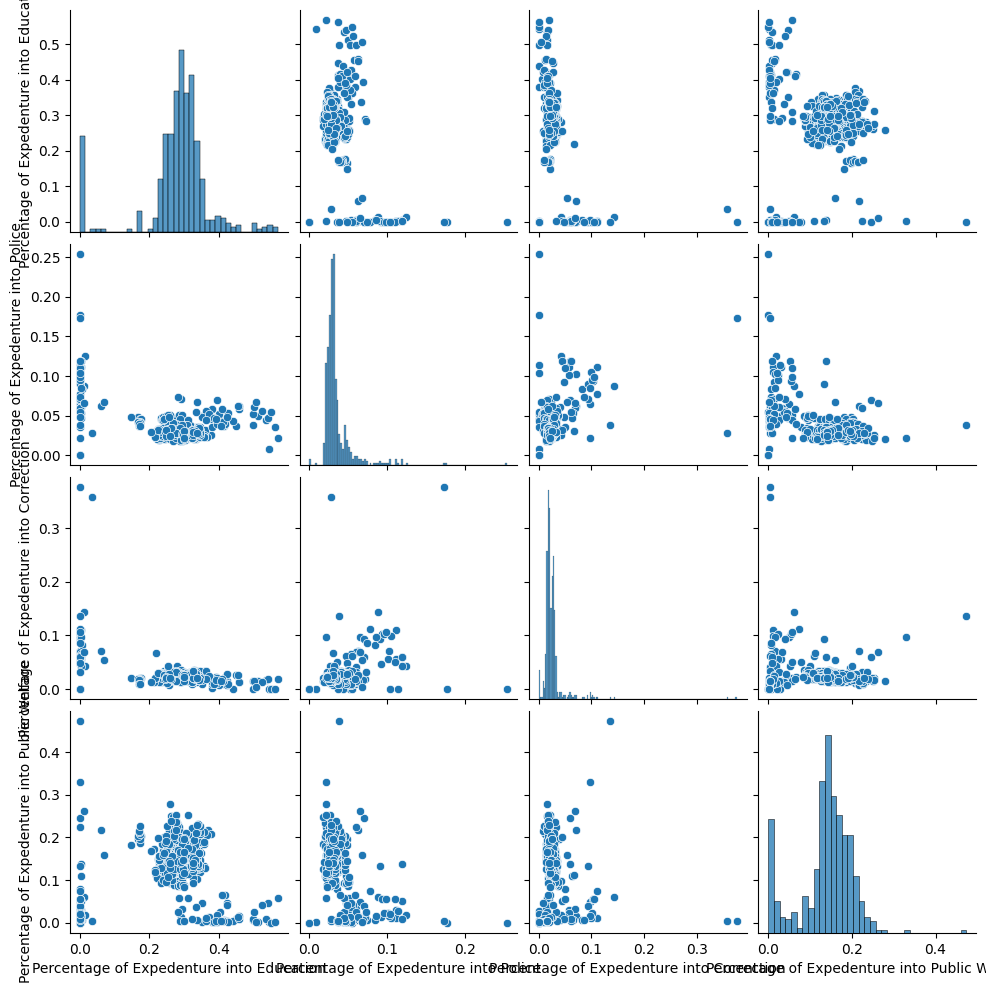

In [15]:
plt.figure()
percentages_df = school_scores_df[newColumns]
sns.pairplot(percentages_df, vars=percentages_df.columns)
plt.show()

False


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

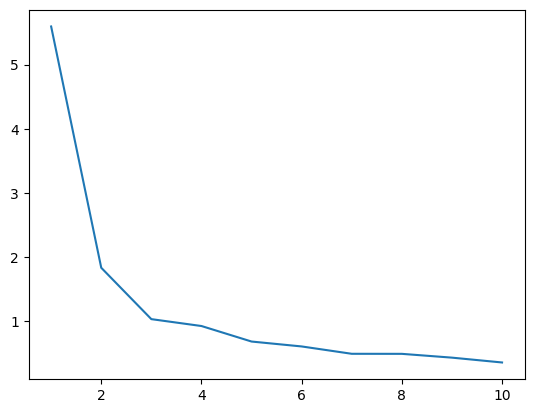

In [97]:
from sklearn import cluster

percentages_df.dropna()
print(np.isnan(percentages_df.values.any()))

X = percentages_df.values
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(X)

copy_df = percentages_df.copy(deep=True)
copy_df["Cluster"] = kmeans.labels_

calculate_WSS(X, 10)
plt.figure()
plt.plot(range(1,11), calculate_WSS(X, 10))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

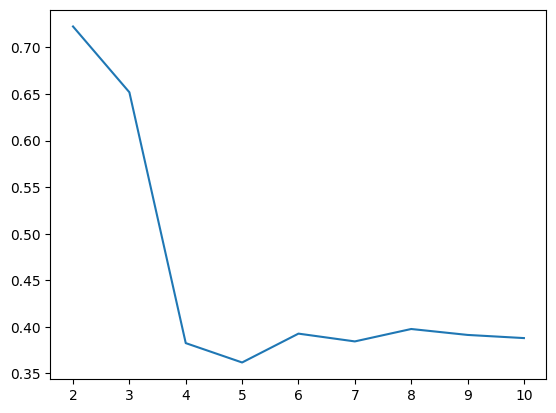

In [24]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans2 = KMeans(n_clusters = k).fit(X)
  labels = kmeans2.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

plt.figure()
plt.plot(range(2,11), sil)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/

<Figure size 640x480 with 0 Axes>

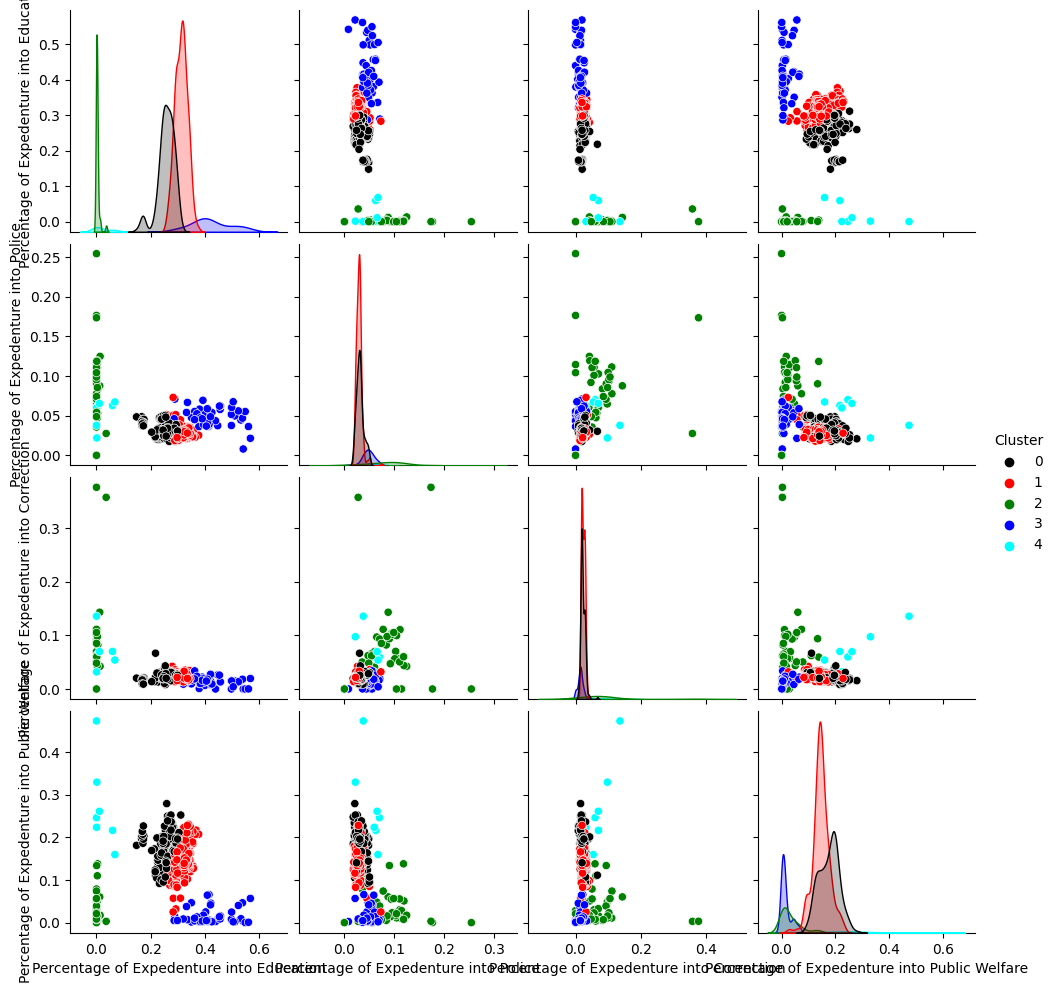

In [98]:
plt.figure()
sns.pairplot(copy_df, vars = copy_df.columns[:-1], palette=['black', 'red', 'green', 'blue', 'cyan', 'purple', 'orange', 'yellow', 'brown', 'pink'], hue = "Cluster")
plt.show()

In [99]:
cluster_number = kmeans.labels_
pd.crosstab(school_scores_df["Total.Math_Quartile"], cluster_number)


col_0,0,1,2,3,4
Total.Math_Quartile,,,,,
0,28,25,6,4,0
1,23,17,2,6,1
2,8,37,6,5,0
3,13,31,2,5,1
4,20,27,4,5,0
5,21,24,3,5,2
6,34,15,4,5,0
7,17,25,4,5,0
8,8,37,4,5,1
